# (Second) Simplest Working Tensorflow Notebook Ever


In this notebook, we show how to use TensorFlow on a very simple task : estimating the coefficients $a$ and $b$ of an affine function $y = ax + b$. 
Here, instead of observing  $y$, we observe $y$ plus a centered gaussian noise.

In order to estimate $a$ and $b$, we design a loss function : the sum of squared errors between the observations and the predictions for some training samples. Minimizing the loss function will provide an estimation of $a$ and $b$.

TensorFlow is great to design neural networks, but it is more broadly a math toolbox. Here we will see how we can use a gradient descent to find $a$ and $b$.

In the following notebooks, we will see how the exact same methodology applies to estimate the optimal parameters of a neural network, since a neural network is finally just a more complicated function.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Generating data with numpy

In [2]:
# We set the true value of the coefficients, which we will estimate hereafter
a_true, b_true = 1.3, -0.7

For sake of conciseness, we denote $a$ = `a_true` and $b$ = `b_true`. 

Now let's  generate some training samples according to :

$ y_i = a x_i + b + \epsilon_i $ 

where $\epsilon_i \sim \mathcal{N}(0,\sigma^2)$ with $\sigma = 0.1$.

In [3]:
n_sample = 1000
# Generate some abscissa
x = np.random.rand(n_sample)
# Generate the corresponding ordinate
y = a_true * x + b_true + np.random.randn(n_sample) * 0.1

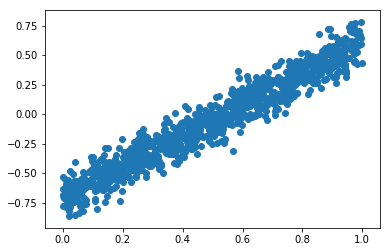

In [4]:
plt.scatter(x, y)

### Finding the coefficients a and b that minimize the sum of the square errors

#####  Random initialization of the variables to estimate
Hereafter, we create two TensorFlow `Variable` objects. These objects will have their values modified while training the model. They will contain estimates of `a_true` and `b_true`. During the optimization, they will get closer and closer to the optimal values. Their values are initialized randomly.

In [5]:
a_estimated = tf.Variable(tf.truncated_normal([1]))
b_estimated = tf.Variable(tf.truncated_normal([1]))
# tf.truncated_normal([1]) : initializes the Variable randomly, as a matrix of dimension [1], i.e. a scalar,
# with a value drawn according to the truncated_normal distribution.

##### Creation of placeholders for the values `x` and `y`
These placeholders are TensorFlow objects that will be fed later, during the optimization or the evaluation stage. One can see them as empty containers that are used to define the dimensions of the data. It enables the machine to build an internal representation of the computations that will be done later.

In [6]:
x_tf  = tf.placeholder(tf.float32, [n_sample])
y_tf = tf.placeholder(tf.float32, [n_sample])

##### Designing a loss function to minimize the sum of the squared errors

For sake of conciseness, we denote $\hat{a}$ = `a_estimated` and $\hat{b}$ = `b_estimated`. And we design the loss function as follows :

loss = $ \sum_{0 \leq i < n_{sample}}  (\hat{a} x_i + \hat{b} - y_i)^2 $

In [7]:
loss =  tf.reduce_sum(tf.square(a_estimated * x_tf + b_estimated - y_tf))

In [8]:
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(loss)

##### Initialization of TensorFlow

In [9]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

#### Gradient descent steps to optimize the value of `a_estimated` and `b_estimated`

In [10]:
n_iter = 500
loss_list = []

In the following loop, we call `sess` while feeding the placeholders with values with the right type and dimensions. 
Two things are done during each iteration.
* The gradient descent performs an optimization step, during which the values of $\hat{a}$ and $\hat{b}$ are brought closer to the optimum.
* The value of the loss at the current iteration is collected in a list. 

In [11]:
for i in range(n_iter):
    sess.run(train_op, feed_dict={y_tf:y, x_tf:x})
    current_loss = sess.run(loss, feed_dict={y_tf:y, x_tf:x})
    loss_list.append(current_loss)

#### Showing the losses for each iteration

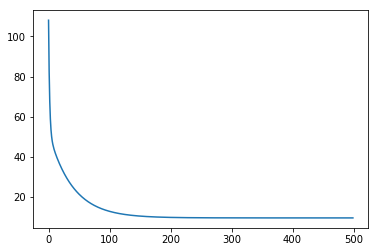

In [12]:
plt.plot(loss_list)

##### And finally, let's see what are the estimated values

In [13]:
a_b_estimated = sess.run([a_estimated, b_estimated])

In [14]:
a_b_estimated

[array([ 1.30727172], dtype=float32), array([-0.70767689], dtype=float32)]

##### Whereas the true values are

In [15]:
a_true, b_true

(1.3, -0.7)

The estimated values are close to the true ones ! Great job.

#### Let's visualize the fitted affine function

In [16]:
a_est = a_b_estimated[0][0]
b_est = a_b_estimated[1][0]

In [17]:
y_est = a_est * x + b_est

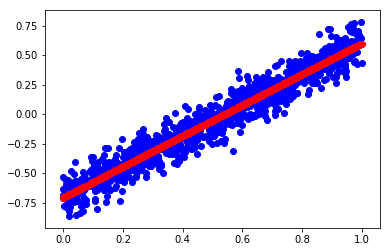

In [18]:
plt.scatter(x,y,color = "b")
plt.scatter(x,y_est, color="r")

### It fits rather well !